In [1]:
import numpy as np
from math import e
from PIL import Image
import glob
import cv2
from matplotlib import pyplot as plt
import matplotlib
from math import exp
from math import sqrt
from scipy.ndimage.interpolation import rotate
from scipy.ndimage.interpolation import shift

In [2]:
def img_chnnls(rgb):
    channels = []
    ch_count = len(rgb[0][0])
    for i in range(ch_count):
        channels.append(rgb[:,:,i])
    return channels

In [3]:
images = np.array([cv2.imread(file,0) for file in glob.glob("C:/Users/sherw/OneDrive/Desktop/DIP_HW5/inputs/p5/*.png")])

# a & b

In [73]:
img1 = images[0]

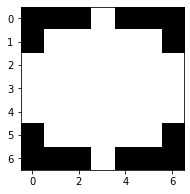

In [28]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
plt.rcParams['figure.figsize'] = [3,3]
plt.imshow(kernel,'gray')
plt.show()

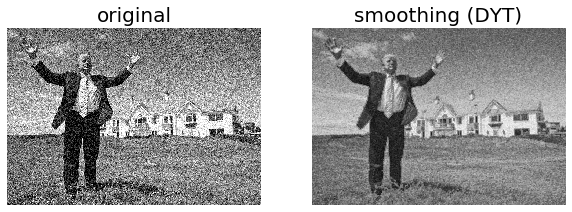

In [75]:
im1_di = cv2.dilate(img1, kernel)
im1_er = cv2.erode(img1, kernel)
im1_sm = (im1_di.astype(np.uint) + im1_er.astype(np.uint))/2

plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(img1,'gray',vmin = 0, vmax = 255)
plt.title('original',size = 20)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(im1_sm  ,'gray')
plt.title('smoothing (DYT)',size = 20)
plt.axis('off')
plt.show()

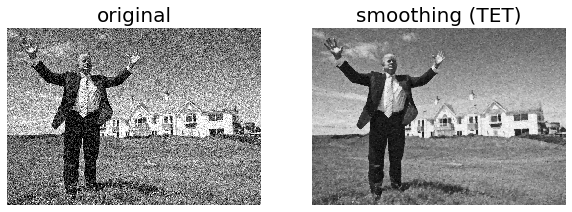

In [76]:
im1_op = cv2.morphologyEx(img1,cv2.MORPH_OPEN, kernel)
im1_cl = cv2.morphologyEx(img1,cv2.MORPH_CLOSE, kernel)
im1_sm_b = (im1_cl.astype(np.uint) + im1_op.astype(np.uint))/2

plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(img1,'gray',vmin = 0, vmax = 255)
plt.title('original',size = 20)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(im1_sm_b ,'gray')
plt.title('smoothing (TET)',size = 20)
plt.axis('off')
plt.show()

# c & d & e

In [36]:
img2 = images[2]

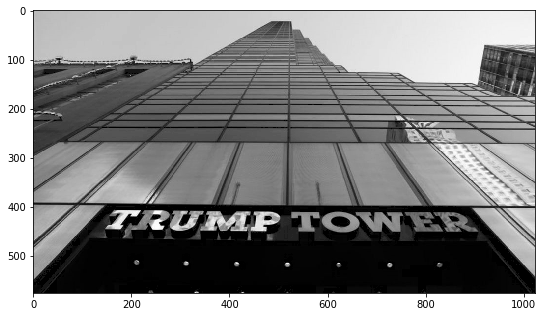

In [37]:
plt.imshow(img2,'gray')
plt.show()

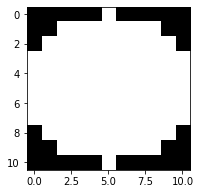

In [29]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
plt.rcParams['figure.figsize'] = [3,3]
plt.imshow(kernel2,'gray')
plt.show()

In [116]:
def dyg(image,ker):
    image_di = cv2.dilate(image, ker)
    image_er = cv2.erode(image, ker)
    image_dyt = (image_er.astype(np.uint) + image_di.astype(np.uint))/2
    dyg = image.astype(np.uint) - image_dyt
    return dyg
    
def teg(image,ker):
    image_op = cv2.morphologyEx(image,cv2.MORPH_OPEN, ker)
    image_cl = cv2.morphologyEx(image,cv2.MORPH_CLOSE, ker)
    image_tet = (image_op.astype(np.uint) + image_cl.astype(np.uint))/2
    teg = image.astype(np.uint) - image_tet
    return teg

def rag(image,ker):
    rag = dyg(image,ker) - teg(image,ker)
    return rag

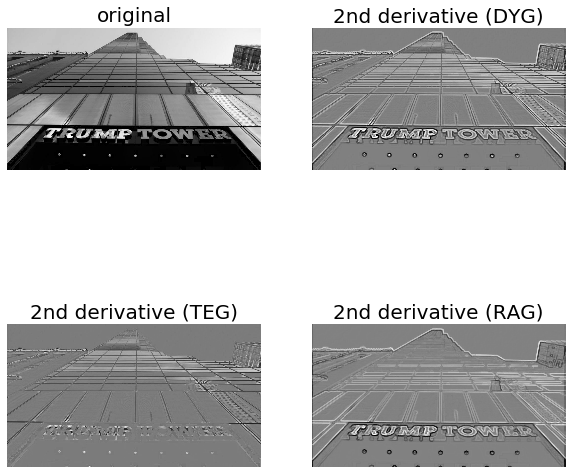

In [117]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))

im2_dyg = dyg(img2,kernel2)
im2_teg = teg(img2,kernel2)
im2_rag = rag(img2,kernel2)

plt.rcParams['figure.figsize'] = [10,10]

plt.subplot(2,2,1)
plt.imshow(img2,'gray',vmin = 0, vmax = 255)
plt.title('original',size = 20)
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(im2_dyg  ,'gray')
plt.title('2nd derivative (DYG)',size = 20)
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(im2_teg  ,'gray')
plt.title('2nd derivative (TEG)',size = 20)
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(im2_rag  ,'gray')
plt.title('2nd derivative (RAG)',size = 20)
plt.axis('off')

plt.show()

# f & g & h

In [4]:
img3 = images[1]

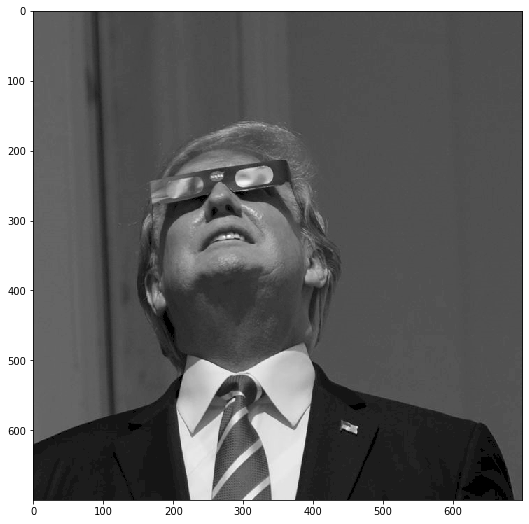

In [33]:
plt.imshow(img3,'gray')
plt.show()

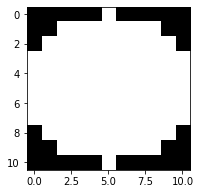

In [11]:
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
plt.rcParams['figure.figsize'] = [3,3]
plt.imshow(kernel3,'gray')
plt.show()

In [16]:
def dyr(image,ker):
    image_di = cv2.dilate(image, ker)
    image_er = cv2.erode(image, ker)
    dyr = image_di.astype(np.uint) - image_er.astype(np.uint)
    return dyr
    
def ter(image,ker):
    image_op = cv2.morphologyEx(image,cv2.MORPH_OPEN, ker)
    image_cl = cv2.morphologyEx(image,cv2.MORPH_CLOSE, ker)
    ter = image_cl.astype(np.uint) - image_op.astype(np.uint)
    return ter

def rar(image,ker):
    rar = dyr(image,ker) - ter(image,ker)
    return rar

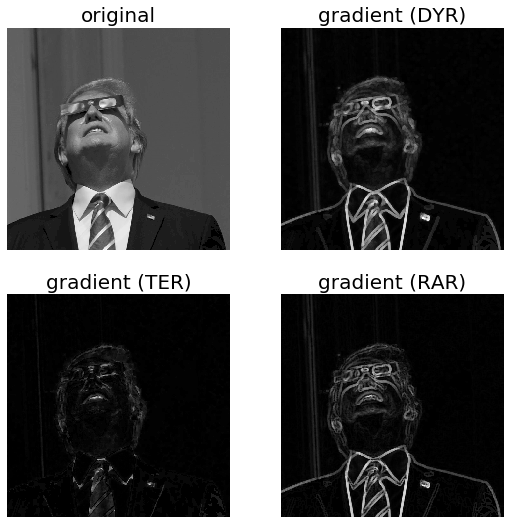

In [32]:
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))

im3_dyr = dyr(img3,kernel3)
im3_ter = ter(img3,kernel3)
im3_rar = rar(img3,kernel3)

plt.rcParams['figure.figsize'] = [9,9]

plt.subplot(2,2,1)
plt.imshow(img3,'gray',vmin = 0, vmax = 255)
plt.title('original',size = 20)
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(im3_dyr  ,'gray')
plt.title('gradient (DYR)',size = 20)
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(im3_ter  ,'gray')
plt.title('gradient (TER)',size = 20)
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(im3_rar  ,'gray')
plt.title('gradient (RAR)',size = 20)
plt.axis('off')

plt.show()